# Advanced Classification

In this notebook, we will cover:

* Decision Tree Classifier
* Random Forest Classifier
* AdaBoost
* Hyperparameter Tuning by GridSearchCV
* Tuning by Randomize Search
* Voting Classifier

Importing all necessary packages

In [ ]:
#!pip install pydotplus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data 'titanic_clean.csv'

In [2]:
# write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### Task 2: Do One Hot encoding for categorical varaibles and store in df

In [3]:
# write code here
df_OneHot = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [4]:
# Write code here to copy into df
df = df_OneHot.copy()

### Task 3: Create dependent and independent varaibles

In [5]:
# write code here
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df[['Survived']]


### Task 4: Split the data into training and testing set and set the random state to 100

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


## Defining Decision Tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf_dt = DecisionTreeClassifier(
    max_depth=3, criterion='gini', random_state=100)

In [10]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [11]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

### Task 5: Find accuracy for Decision Tree

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# write code here
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8507462686567164


### Task 6: Find precision for Decision Tree

In [14]:
from sklearn.metrics import precision_score

In [15]:
# write code here
precision_dt = precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))

Precision: 0.7857142857142857


### Task 7: Find Recall for Decision Tree

In [16]:
from sklearn.metrics import recall_score

In [17]:
# write code here
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))

Recall: 0.8020833333333334


### Task 8: Find F1 Score for Decision Tree

In [18]:
from sklearn.metrics import f1_score

In [19]:
# write code here
dt_f1 = f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

F1 Score: 0.7938144329896908


### Task 9: Print Classification Report for Decision Tree

In [20]:
from sklearn.metrics import classification_report

In [21]:
# write code here
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       172
           1       0.79      0.80      0.79        96

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



### ROC Curve<br>
Importing function to plot ROC AUC Curve

In [22]:
from plot_roc_curve import plot_roc_curve

In [23]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

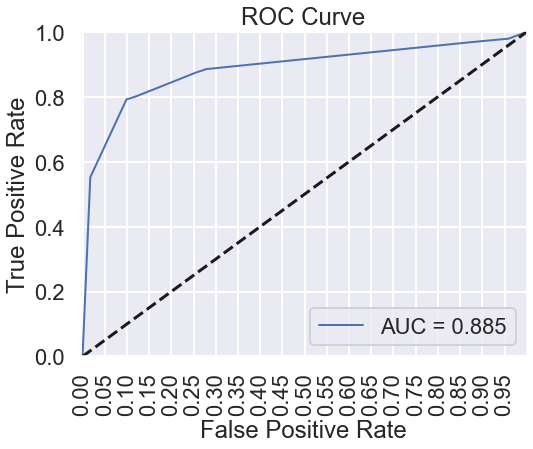

In [24]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

## Ploting Decision Tree

Loading packages

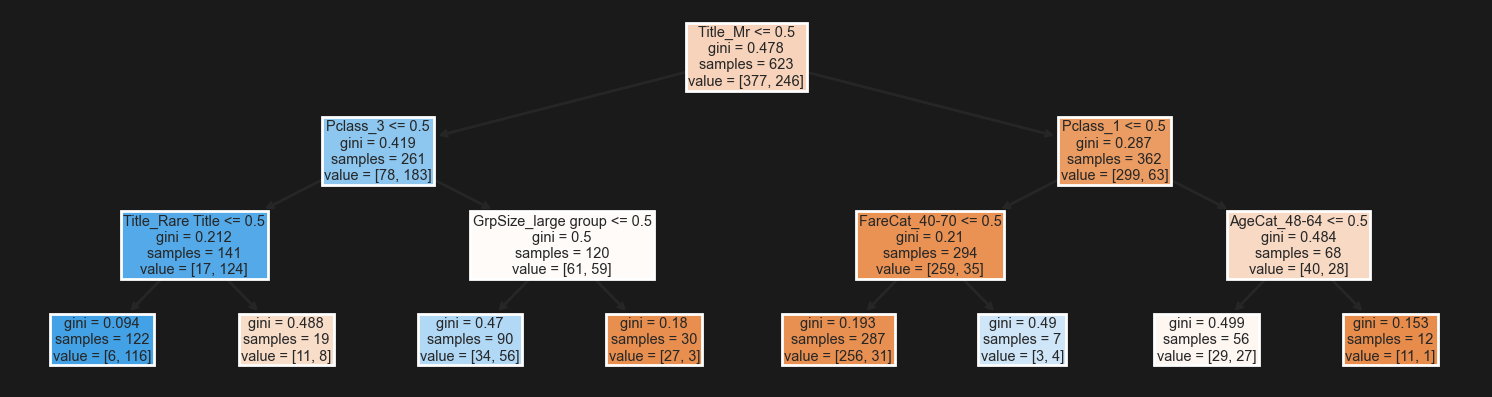

In [25]:
from  sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (19,5), dpi=100, sharey=True ,facecolor ='k')
out=tree.plot_tree(clf_dt,feature_names = list(X.columns), filled = True);

## Features Importance

In [26]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.06720923, 0.        , 0.13844724,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59849287, 0.        , 0.06553138,
       0.        , 0.        , 0.08715219, 0.        , 0.        ,
       0.        , 0.        , 0.02084285, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02232423, 0.        ])

In [27]:
features_tuple = list(zip(X.columns, clf_dt.feature_importances_))

In [28]:
features_tuple

[('SibSp', 0.0),
 ('Parch', 0.0),
 ('Pclass_1', 0.06720923019824247),
 ('Pclass_2', 0.0),
 ('Pclass_3', 0.13844724222638327),
 ('Sex_female', 0.0),
 ('Sex_male', 0.0),
 ('Embarked_C', 0.0),
 ('Embarked_Q', 0.0),
 ('Embarked_S', 0.0),
 ('Title_Master', 0.0),
 ('Title_Miss', 0.0),
 ('Title_Mr', 0.5984928741149036),
 ('Title_Mrs', 0.0),
 ('Title_Rare Title', 0.06553137630060007),
 ('GrpSize_couple', 0.0),
 ('GrpSize_group', 0.0),
 ('GrpSize_large group', 0.08715219205067479),
 ('GrpSize_solo', 0.0),
 ('FareCat_0-10', 0.0),
 ('FareCat_100+', 0.0),
 ('FareCat_25-40', 0.0),
 ('FareCat_40-70', 0.02084285439629028),
 ('FareCat_70-100', 0.0),
 ('FareCat_Oct-25', 0.0),
 ('AgeCat_0-16', 0.0),
 ('AgeCat_16-32', 0.0),
 ('AgeCat_32-48', 0.0),
 ('AgeCat_48-64', 0.02232423071290549),
 ('AgeCat_64+', 0.0)]

In [29]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [30]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)
feature_imp

,Feature Names,Importance
12,Title_Mr,0.598493
4,Pclass_3,0.138447
17,GrpSize_large group,0.087152
2,Pclass_1,0.067209
14,Title_Rare Title,0.065531
28,AgeCat_48-64,0.022324
22,FareCat_40-70,0.020843
0,SibSp,0.000000
21,FareCat_25-40,0.000000
19,FareCat_0-10,0.000000


Text(0.5, 1.0, 'Decision Classifier - Features Importance')

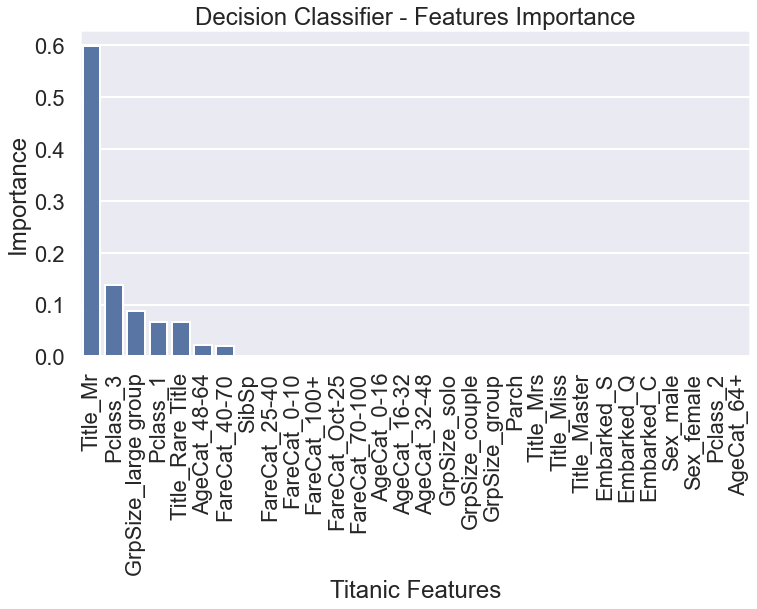

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

# Random Forest

### Defining Random Forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf_rf = RandomForestClassifier(random_state=100)

In [34]:
clf_rf.fit(xtrain, ytrain)

C:\Users\GM Enterprises\AppData\Local\Temp\ipykernel_13176\1230507603.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=100)

In [35]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

### Task 10: Find Precision for Random Forest

In [37]:
# write code here
precision_rf = precision_score(ytest, rf_pred)
print("Precision: {}".format(precision_rf))

Precision: 0.7029702970297029


### Task 11: Find Accuracy for Random Forest

In [38]:
# write code here
accuracy_rf = accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.7947761194029851


### Task 12: Find Recall for Random Forest

In [39]:
# write code here
recall_rf = recall_score(ytest, rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.7395833333333334


### Task 13: Find F1 Score for Random Forest

In [41]:
# write code here
rf_f1 = f1_score(ytest, rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.7208121827411168


### Task 14: Print Classification Report for Random Forest

In [ ]:
from sklearn.metrics import classification_report

In [43]:
# write code here
cr = classification_report(ytest, rf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       172
           1       0.70      0.74      0.72        96

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



### ROC Curve for Random Forest

In [44]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

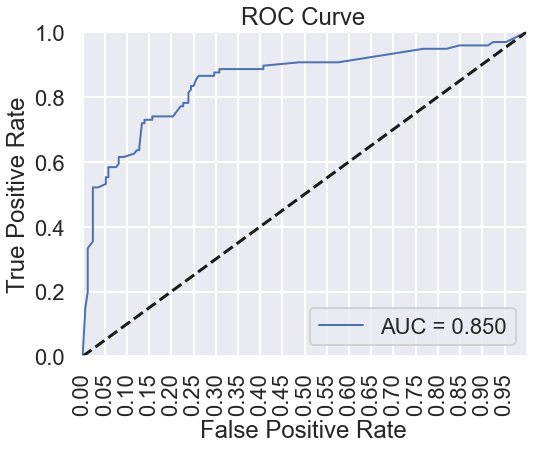

In [45]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

### Features Importance

In [46]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [47]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [48]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

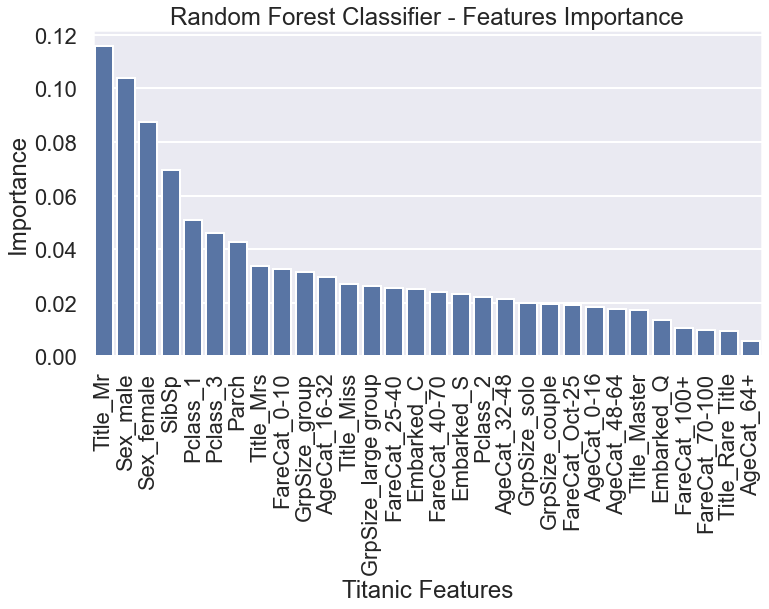

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

Importing GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

Making grid of parameters and running GridSearch CV

In [51]:
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 54},
 0.8218709677419355)

So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 18** as optimum parameters

Let's try new set of parameter values near to optimum.

In [52]:
param_grid2 = {"n_estimators": [9, 12, 15, 18, 21, 24, 27],
               "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               "min_samples_leaf": [1, 2, 3, 4]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
RF_cv2.best_params_, RF_cv2.best_score_

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 13, 'min_samples_leaf': 2, 'n_estimators': 9},
 0.8234709677419355)

 So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 15** as optimum parameters

### Tuned Random Forest

In [56]:
RF_grid = RF_cv2.best_estimator_

In [57]:
RF_grid.fit(xtrain, ytrain)

C:\Users\GM Enterprises\AppData\Local\Temp\ipykernel_13176\4208728583.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_grid.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=13, min_samples_leaf=2, n_estimators=9,
                       random_state=100)

In [58]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t = RF_grid.predict_proba(xtest)[:, 1]

### Task 15: Find Accuracy for Tuned Random Forest

In [59]:
# write code here
accuracy_rf_t = accuracy_score(ytest, rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.835820895522388


### Task 16: Find Recall for Tuned Random Forest

In [60]:
# write code here
recall_rf_t = recall_score(ytest, rf_pred_t)
recall_rf_t

0.8020833333333334

### Task 17: Find Precision for Tuned Random Forest

In [61]:
# write code here
precision_rf_t = precision_score(ytest, rf_pred_t)
precision_rf_t

0.7549019607843137

### Task 18: Find F1 Score

In [85]:
# write code here
rf_t_f1 = f1_score(ytest, rf_pred_t)
rf_t_f1

0.7777777777777777

### Task 19: Print Classification Report for Tuned Random Forest

In [88]:
# write code here
print(classification_report(ytest, rf_pred_t))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       172
           1       0.75      0.80      0.78        96

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.84      0.84       268



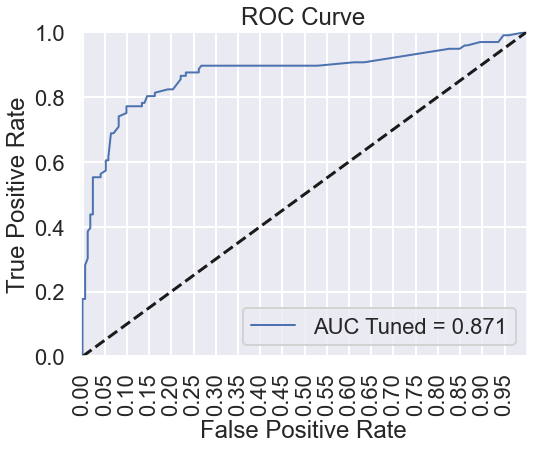

In [62]:
auc_rf_t = roc_auc_score(ytest, rf_pred_prb_t)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb_t)
plot_roc_curve(fpr, tpr, label='AUC Tuned = %0.3f' % auc_rf_t)

### Hyperparameters Tuning Using Randomized Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rf_rs = RandomForestClassifier(random_state=100)

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [66]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [67]:
rf_random = RandomizedSearchCV(
    estimator=rf_rs, param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   2.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   2.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   2.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=10, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=10, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=10, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=10, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=10, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=230; total time=   0.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=230; total time=   0.4s
[CV] END max_depth=60, min_samples_split=2, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=2, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=2, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=2, n_estimators=890; total time=   1.8s
[CV] END max_depth=30, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=10; total time=   0.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataCon

[CV] END max_depth=40, min_samples_split=2, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=40, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=10, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=10, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=50, min_samples_split=10, n_estimators=780; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=450; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=450; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=780; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=780; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=780; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=780; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=780; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=120; total time=   0.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   1.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   1.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=2, n_estimators=1000; total time=   2.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=2, n_estimators=1000; total time=   2.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_split=10, n_estimators=10; total time=   0.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataCon

[CV] END max_depth=70, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=450; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=5, n_estimators=450; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=2, n_estimators=340; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=2, n_estimators=340; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=2, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=110, min_samples_split=10, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=890; total time=   1.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=890; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=890; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=890; total time=   1.8s
[CV] END max_depth=90, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=90, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=90, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=90, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=90, min_samples_split=10, n_estimators=10; total time=   0.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataCon

[CV] END max_depth=90, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=780; total time=   1.5s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=780; total time=   1.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=5, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=5, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, min_samples_split=5, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=890; total time=   1.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=5, n_estimators=890; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=450; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=450; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=450; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=450; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=1000; total time=   2.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=340; total time=   0.7s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=450; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=70, min_samples_split=2, n_estimators=450; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   0.8s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   0.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   2.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   1.9s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=560; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_split=2, n_estimators=560; total time=   1.1s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=10, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=10, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=10, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=10, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=10, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=340; total time=   0.6s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=60, min_samples_split=2, n_estimators=340; total time=   1.0s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=670; total time=   1.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=670; total time=   1.3s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=90, min_samples_split=2, n_estimators=670; total time=   1.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=80, min_samples_split=10, n_estimators=120; total time=   0.2s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=100, min_samples_split=5, n_estimators=230; total time=   0.4s


C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=100, verbose=2)

**Selecting the best classifier**

In [69]:
clf_rf_rand = rf_random.best_estimator_
clf_rf_rand

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=100)

In [70]:
clf_rf_rand.fit(xtrain, ytrain)

C:\Users\GM Enterprises\AppData\Local\Temp\ipykernel_13176\2036642555.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf_rand.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=100)

In [71]:
pred_rf_rand = clf_rf_rand.predict(xtest)

In [72]:
prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:, 1]

### Task 20: Find the Accuracy of Tuned Random Forest through Randomized Search

In [86]:
# write code here
accuracy_rf_r = accuracy_score(ytest, pred_rf_rand)
accuracy_rf_r

0.8395522388059702

### Task 21: Find the Precision of Tuned Random Forest through Randomized Search

In [87]:
# write code here
precision_rf_r = precision_score(ytest, pred_rf_rand)
precision_rf_r

0.7523809523809524

### Task 22: Find the Recall of Tuned Random Forest through Randomized Search

In [89]:
# write code here
recall_rf_r = recall_score(ytest, pred_rf_rand)
recall_rf_r

0.8229166666666666

### Task 23: Find the F1-Score of Tuned Random Forest through Randomized Search

In [90]:
# write code here
f1_rf_r = f1_score(ytest, pred_rf_rand)
f1_rf_r

0.7860696517412935

### Task 24: Print the Classification Report of Tuned Random Forest through Randomized Search

In [74]:
# write code here
print(classification_report(ytest, pred_rf_rand))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       172
           1       0.75      0.82      0.79        96

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



### ROC Curve

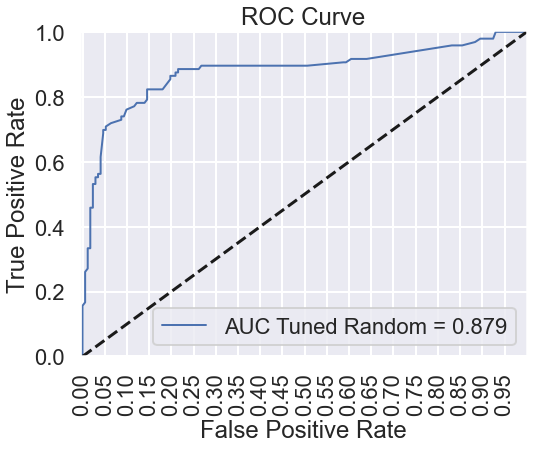

In [75]:
auc_rf_r = roc_auc_score(ytest, prb_rf_rand)
fpr, tpr, threshold = roc_curve(ytest, prb_rf_rand)
plot_roc_curve(fpr, tpr, label='AUC Tuned Random = %0.3f' % auc_rf_r)

# Ada Boost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=100)

In [78]:
pred_clf_adb = clf_adb.predict(xtest)

In [79]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

### Task 25: Find Accuracy for Ada Boost

In [91]:
# write code here
accuracy_adb = accuracy_score(ytest, pred_clf_adb)
accuracy_adb

0.8283582089552238

### Task 26: Find Precision for Ada Boost

In [94]:
# write code here
precision_adb = precision_score(ytest, pred_clf_adb)
precision_adb

0.7272727272727273

### Task 27: Find Recall for Ada Boost

In [93]:
# write code here
recall_adb = recall_score(ytest, pred_clf_adb)
recall_adb

0.8333333333333334

### Task 28: Find F1 Score for Ada Boost

In [92]:
# write code here
f1_adb = f1_score(ytest, pred_clf_adb)
f1_adb

0.7766990291262137

### Task 29: Print Classification Report for Ada Boost

In [83]:
# write code here
print(classification_report(ytest, pred_clf_adb))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       172
           1       0.73      0.83      0.78        96

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

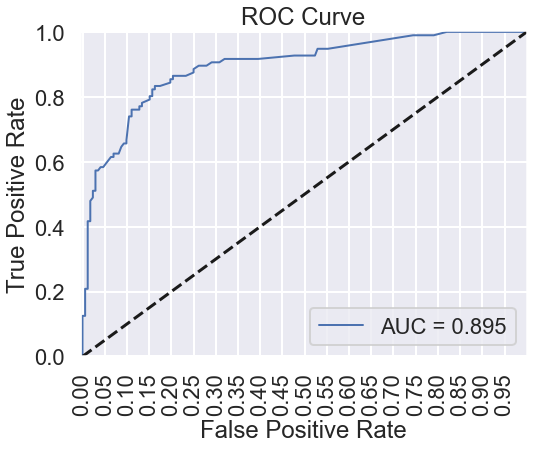

In [84]:
auc_adb = roc_auc_score(ytest, adb_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, adb_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_adb)

# Comparison

In [95]:
comparison_dict = {"Algorithm": ["Decision Tree", "Random Forest", "Tuned Random Forest(Grid)", "Tuned Random Forest(Random)", "Ada Boost"],
                   "Accuracy": [accuracy_dt, accuracy_rf, accuracy_rf_t, accuracy_rf_r, accuracy_adb],
                   "Precision": [precision_dt, precision_rf, precision_rf_t, precision_rf_r, precision_adb],
                   "Recall": [recall_dt, recall_rf, recall_rf_t, recall_rf_r, recall_adb],
                   "AUC": [auc_dt, auc_rf, auc_rf_t, auc_rf_r, auc_adb],
                   "F1 Score": [dt_f1, rf_f1, rf_t_f1, f1_rf_r, f1_adb]
                   }

In [98]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
4,Ada Boost,0.828358,0.727273,0.833333,0.895409,0.776699
3,Tuned Random Forest(Random),0.839552,0.752381,0.822917,0.879391,0.786070
0,Decision Tree,0.850746,0.785714,0.802083,0.885356,0.793814
2,Tuned Random Forest(Grid),0.835821,0.754902,0.802083,0.871003,0.777778
1,Random Forest,0.794776,0.702970,0.739583,0.849685,0.720812


# Submission on Kaggle

### Task 30: Import test data

In [161]:
# Write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


### Task 31: Do One Hot encoding of test data

In [162]:
# write code here
df_OneHot = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])
df_OneHot.head()
df_test = df_OneHot.copy()

### Task 32: Separate Passenger ID for submission

In [163]:
df_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [164]:
# Write code here
PassengerID = df_test['PassengerId']


In [165]:
df_test = df_test.drop('PassengerId', axis=1)

### Task 33: Do prediction through final model

In [166]:
# write code here
pred_final = clf_adb.predict(df_test)

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- FareCat_10-25
Feature names seen at fit time, yet now missing:
- FareCat_Oct-25

  warnings.warn(message, FutureWarning)


#### Creating Data Frame for submission

In [167]:
submission = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final})

### Task 34: Export the dataset into csv file

In [168]:
# Write code here
submission.to_csv('my_submission v2.0.csv', index=False)

In [ ]:
!pip install xgboost